In [ ]:
import pandas as pd

In [ ]:
%fs 
cp dbfs:/FileStore/shared_uploads/zaderohish5@gmail.com/returns.txt file:/databricks/driver/

res0: Boolean = true

### Pandas Day 4: time series, TypeCasting and working with other file types

In [ ]:
df = pd.read_csv('orders.txt')
df

,order_id,order_date,customer_name,city,category,product_id,sales,profit
0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113
1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354
2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696
3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257
4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288
...,...,...,...,...,...,...,...,...
5004,US-2021-168802,2021-11-03,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696
5005,US-2021-169320,2021-07-23,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896
5006,US-2021-169488,2021-09-07,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812
5007,US-2021-169502,2021-08-28,Matthew Grinstein,Milwaukee,Office Supplies,OFF-AP-10001947,91.600,26.5640


#### Time Series in Pandas
- Time series data is a sequence of data points recorded over time, often at regular intervals. 
- Pandas, a powerful Python library for data analysis, offers extensive functionality for handling time series data.

##### Datetime Index: 

The index of the DataFrame is often converted to a datetime index for easy manipulation of time series data.

In [ ]:
# order_date is representing date data but it stored as an object
df.dtypes

Out[4]: order_id          object
order_date        object
customer_name     object
city              object
category          object
product_id        object
sales            float64
profit           float64
dtype: object

In [ ]:
# casting to date while reading using parse_dates
pd.read_csv('orders.txt',parse_dates=['order_date']).dtypes


Out[8]: order_id                 object
order_date       datetime64[ns]
customer_name            object
city                     object
category                 object
product_id               object
sales                   float64
profit                  float64
dtype: object

In [ ]:
# using to_datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

Out[12]: order_id                 object
order_date       datetime64[ns]
customer_name            object
city                     object
category                 object
product_id               object
sales                   float64
profit                  float64
dtype: object

In [ ]:
dates = ['2020/01/01', '2021-4-05']
# pd.to_datetime(dates)
# pd.to_datetime(dates, format='%Y-%m-%d')
pd.to_datetime(dates, format='mixed', errors='ignore') # to ignore errors and save values as it is

Out[23]: Index(['2020/01/01', '2021-4-05'], dtype='object')

In [ ]:
df = pd.read_csv('orders.txt',parse_dates=['order_date'],index_col='order_date')
df

,order_id,customer_name,city,category,product_id,sales,profit
order_date,,,,,,,
2018-09-07,CA-2018-100006,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113
2018-07-08,CA-2018-100090,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354
2018-03-14,CA-2018-100293,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696
2018-01-28,CA-2018-100328,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257
2018-04-08,CA-2018-100363,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288
...,...,...,...,...,...,...,...
2021-11-03,US-2021-168802,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696
2021-07-23,US-2021-169320,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896
2021-09-07,US-2021-169488,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812


In [ ]:
df['2020-01-01':'2020-01-05']

<command-940143815941544>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['2020-01-01':'2020-01-05']


,order_id,customer_name,city,category,product_id,sales,profit
order_date,,,,,,,
2020-01-03,CA-2020-105207,Bill Overfelt,Broken Arrow,Furniture,FUR-TA-10000617,1592.850,350.4270
2020-01-03,CA-2020-125206,Lena Radford,Los Angeles,Office Supplies,OFF-ST-10003692,114.460,28.6150
2020-01-05,CA-2020-134474,Anthony Johnson,Jacksonville,Office Supplies,OFF-AR-10003958,5.248,0.5904
2020-01-04,CA-2020-158211,Ben Peterman,Philadelphia,Office Supplies,OFF-AR-10004078,4.672,0.5840
2020-01-02,CA-2020-160304,Brendan Murry,Gaithersburg,Furniture,FUR-BO-10004709,173.940,38.2668
2020-01-03,US-2020-116365,Christine Abelman,San Antonio,Technology,TEC-AC-10002217,30.080,-5.2640
2020-01-04,US-2020-164630,Erica Bern,Charlotte,Technology,TEC-CO-10000971,959.968,119.9960


In [ ]:
# after soring the index the warning has gone
df.sort_index(inplace=True)
df['2020-01-01' :'2020-03-01']

,order_id,customer_name,city,category,product_id,sales,profit
order_date,,,,,,,
2020-01-02,CA-2020-160304,Brendan Murry,Gaithersburg,Furniture,FUR-BO-10004709,173.940,38.2668
2020-01-03,US-2020-116365,Christine Abelman,San Antonio,Technology,TEC-AC-10002217,30.080,-5.2640
2020-01-03,CA-2020-125206,Lena Radford,Los Angeles,Office Supplies,OFF-ST-10003692,114.460,28.6150
2020-01-03,CA-2020-105207,Bill Overfelt,Broken Arrow,Furniture,FUR-TA-10000617,1592.850,350.4270
2020-01-04,US-2020-164630,Erica Bern,Charlotte,Technology,TEC-CO-10000971,959.968,119.9960
...,...,...,...,...,...,...,...
2020-02-27,CA-2020-128706,Don Weiss,Houston,Furniture,FUR-FU-10004053,16.192,-6.8816
2020-02-28,CA-2020-101623,Rick Reed,New York City,Office Supplies,OFF-FA-10003495,36.480,18.2400
2020-02-28,CA-2020-111283,Lena Cacioppo,Newark,Office Supplies,OFF-AR-10001615,111.104,8.3328


In [ ]:
# we can also do with loc as order date is an index
df.loc['2020-01-01' :'2020-03-01']

,order_id,customer_name,city,category,product_id,sales,profit
order_date,,,,,,,
2020-01-02,CA-2020-160304,Brendan Murry,Gaithersburg,Furniture,FUR-BO-10004709,173.940,38.2668
2020-01-03,US-2020-116365,Christine Abelman,San Antonio,Technology,TEC-AC-10002217,30.080,-5.2640
2020-01-03,CA-2020-125206,Lena Radford,Los Angeles,Office Supplies,OFF-ST-10003692,114.460,28.6150
2020-01-03,CA-2020-105207,Bill Overfelt,Broken Arrow,Furniture,FUR-TA-10000617,1592.850,350.4270
2020-01-04,US-2020-164630,Erica Bern,Charlotte,Technology,TEC-CO-10000971,959.968,119.9960
...,...,...,...,...,...,...,...
2020-02-27,CA-2020-128706,Don Weiss,Houston,Furniture,FUR-FU-10004053,16.192,-6.8816
2020-02-28,CA-2020-101623,Rick Reed,New York City,Office Supplies,OFF-FA-10003495,36.480,18.2400
2020-02-28,CA-2020-111283,Lena Cacioppo,Newark,Office Supplies,OFF-AR-10001615,111.104,8.3328


In [ ]:
# now order_date is type datetime64, we can access the other attributes of datetime64
# df['order_date'].dt.day_name() # getting key_error(used to work for previous versions)
df.index.year
df.index.day_name
df.index.month

Out[44]: Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='order_date', length=5009)

#### Resampling: 
Aggregate data by a new time frequency (e.g., converting daily data to monthly data).

In [ ]:
df.resample('M').mean()  # Resample to monthly frequency, taking the mean

,sales,profit
order_date,,
2018-01-31,196.901469,25.006862
2018-02-28,93.078214,14.039293
2018-03-31,210.697070,-7.325470
2018-04-30,184.639136,23.618500
2018-05-31,240.451667,23.901987
2018-06-30,243.669312,27.481809
2018-07-31,197.087615,10.743457
2018-08-31,190.887271,26.642651
2018-09-30,256.673529,16.594541


In [ ]:
# we can used other aggregate functions as well
df.resample('M').sum()
df.resample('Y').max()
df.resample('Y').min()

,order_id,customer_name,city,category,product_id,sales,profit
order_date,,,,,,,
2018-12-31,CA-2018-100006,Aaron Bergman,Akron,Furniture,FUR-BO-10000330,0.852,-734.5264
2019-12-31,CA-2019-100146,Aaron Hawkins,Akron,Furniture,FUR-BO-10000330,1.080,-1862.3124
2020-12-31,CA-2020-100041,Aaron Bergman,Akron,Furniture,FUR-BO-10000362,0.836,-760.9800
2021-12-31,CA-2021-100013,Aaron Hawkins,Aberdeen,Furniture,FUR-BO-10000112,0.444,-2929.4845


#### Plotting

Pandas provides easy-to-use interfaces for visualizing data through Matplotlib, a popular plotting library in Python.

In [ ]:
#pip install matplotlib
%matplotlib inline

Out[47]: <AxesSubplot:xlabel='order_date'>

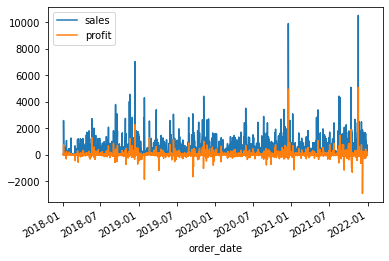

In [ ]:
# Line Plot: Default plot type when you call .plot() on a DataFrame or Series.
df.plot()

Out[49]: <AxesSubplot:xlabel='order_date'>

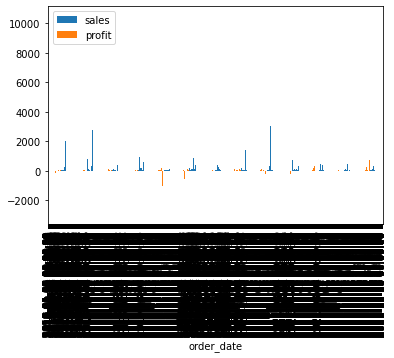

In [ ]:
# Bar Plot
df.plot(kind='bar')

In [ ]:
# pie chart
df.plot('category', 'sales', kind='pie', title='my first pie chart')

Out[50]: <AxesSubplot:title={'center':'my first pie chart'}, ylabel='sales'><Figure size 432x288 with 1 Axes>

Out[51]: <AxesSubplot:ylabel='Frequency'>

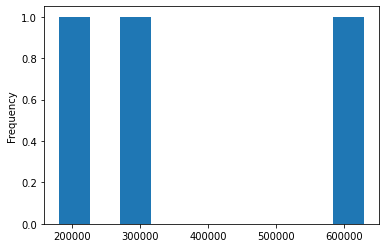

In [ ]:
# Histogram
df.groupby('category')['sales'].sum().plot(kind='hist', bins=10)

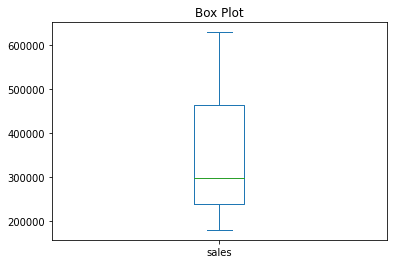

In [ ]:
# Box Plot
import matplotlib.pyplot as plt

df.groupby('category')['sales'].sum().plot(kind='box')
plt.title('Box Plot')
plt.show()

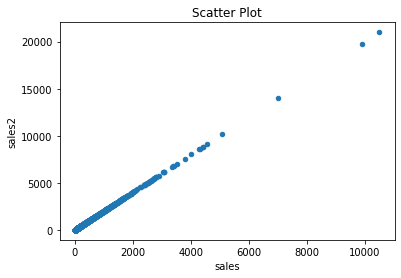

In [ ]:
# Scatter Plot: Shows the relationship between two variables
df = pd.read_csv('orders.txt',parse_dates=['order_date'],index_col='order_date')
df['sales2'] = df['sales'] * 2
df.plot(kind='scatter', x='sales', y='sales2')
plt.title('Scatter Plot')
plt.show()

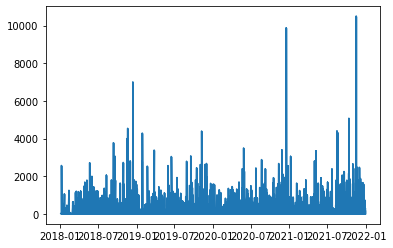

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-940143815941562>:2
      1 # Area Plot: Similar to a line plot but filled with color.
----> 2 df.plot(kind='area')
      3 plt.title('Area Plot')
      4 plt.show()

File /databricks/python/lib/python3.9/site-packages/pandas/plotting/_core.py:972, in PlotAccessor.__call__(self, *args, **kwargs)
    969             label_name = label_kw or data.columns
    970             data.columns = label_name
--> 972 return plot_backend.plot(data, kind=kind, **kwargs)

File /databricks/python/lib/python3.9/site-packages/pandas/plotting/_matplotlib/__init__.py:71, in plot(data, kind, **kwargs)
     69         kwargs["ax"] = getattr(ax, "left_ax", ax)
     70 plot_obj = PLOT_CLASSES[kind](data, **kwargs)
---> 71 plot_obj.generate()
     72 plot_obj.draw()
     73 return plot_obj.result

File /databricks/python/lib/python3.9/site-packages

In [ ]:
# Area Plot: Similar to a line plot but filled with color.
df.plot(kind='area')
plt.title('Area Plot')
plt.show()

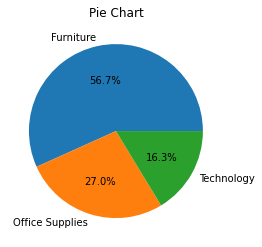

In [ ]:
# Pie Chart: Best for showing proportions.
df.groupby('category')['sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart')
plt.ylabel('')  # Hide the y-label
plt.show()

#### Type Casting

In [ ]:
df['sales_int']= df['sales'].astype('int')
df

,order_id,customer_name,city,category,product_id,sales,profit,sales2,sales_int
order_date,,,,,,,,,
2018-09-07,CA-2018-100006,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113,755.940,377
2018-07-08,CA-2018-100090,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354,1004.976,502
2018-03-14,CA-2018-100293,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696,182.112,91
2018-01-28,CA-2018-100328,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257,7.856,3
2018-04-08,CA-2018-100363,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288,4.736,2
...,...,...,...,...,...,...,...,...,...
2021-11-03,US-2021-168802,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696,36.736,18
2021-07-23,US-2021-169320,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896,23.360,11
2021-09-07,US-2021-169488,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812,79.920,39


**Note: If any value contains NaN, we cannot convert its data type**

In [ ]:
import numpy as np
df = pd.read_csv('orders.txt')
df.dtypes

# need to handle nan values before converting 
df['sales'].fillna(0).astype('int')
df

,order_id,order_date,customer_name,city,category,product_id,sales,profit
0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113
1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354
2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696
3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257
4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288
...,...,...,...,...,...,...,...,...
5004,US-2021-168802,2021-11-03,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696
5005,US-2021-169320,2021-07-23,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896
5006,US-2021-169488,2021-09-07,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812
5007,US-2021-169502,2021-08-28,Matthew Grinstein,Milwaukee,Office Supplies,OFF-AP-10001947,91.600,26.5640


#### Pivoting in pandas

In [ ]:
df.pivot_table(index = 'city' , columns ='category' , values='sales' , aggfunc='sum')

category,Furniture,Office Supplies,Technology
city,,,
Aberdeen,NaN,25.500,NaN
Abilene,NaN,1.392,NaN
Akron,433.596,373.358,279.960
Albuquerque,NaN,445.832,302.376
Alexandria,204.640,153.780,NaN
...,...,...,...
Woonsocket,52.960,97.230,NaN
Yonkers,851.482,70.416,216.400
York,422.058,37.896,NaN


#### Working with Excel files
to work with xlsx file need to install openpyxl: pip install openpyxl

In [ ]:
pip install openpyxl

Python interpreter will be restarted.
Python interpreter will be restarted.


In [ ]:
# writing excel file to location
# df.to_excel('orders.xlsx')

# By default it will read data from sheet 1
df = pd.read_excel('orders.xlsx')
df

# readind data from specific sheet. you can also index as sheet_name = 0
df=pd.read_excel('orders.xlsx',sheet_name=0)
df

,Unnamed: 0,order_id,order_date,customer_name,city,category,product_id,sales,profit
0,0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113
1,1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354
2,2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696
3,3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257
4,4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288
...,...,...,...,...,...,...,...,...,...
5004,5004,US-2021-168802,2021-11-03,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696
5005,5005,US-2021-169320,2021-07-23,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896
5006,5006,US-2021-169488,2021-09-07,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812
5007,5007,US-2021-169502,2021-08-28,Matthew Grinstein,Milwaukee,Office Supplies,OFF-AP-10001947,91.600,26.5640


#### Working with json files

In [ ]:
import pyarrow

In [ ]:
df = pd.read_csv('returns.txt')
df

,order_id,return_reason
0,CA-2020-104689,Wrong Items
1,CA-2020-105081,Wrong Items
2,CA-2020-105291,Wrong Items
3,CA-2020-105585,Wrong Items
4,CA-2020-106950,Wrong Items
...,...,...
291,US-2021-136679,Others
292,US-2021-147886,Others
293,US-2021-147998,Wrong Items
294,US-2021-151127,Wrong Items


In [ ]:
#  writing json to a location
df.to_json('returns.json')


In [ ]:
# reading a json file which we have written to a loation
%fs 
head file:/databricks/driver/returns.json 

{"order_id":{"0":"CA-2020-104689","1":"CA-2020-105081","2":"CA-2020-105291","3":"CA-2020-105585","4":"CA-2020-106950","5":"CA-2020-109806","6":"CA-2020-109869","7":"CA-2020-111682","8":"CA-2020-112123","9":"CA-2020-112340","10":"CA-2020-113341","11":"CA-2020-114307","12":"CA-2020-114727","13":"CA-2020-115917","14":"CA-2020-116547","15":"CA-2020-116736","16":"CA-2020-118311","17":"CA-2020-118500","18":"CA-2020-118899","19":"CA-2020-120873","20":"CA-2020-123526","21":"CA-2020-124527","22":"CA-2020-126529","23":"CA-2020-126732","24":"CA-2020-128671","25":"CA-2020-130477","26":"CA-2020-130638","27":"CA-2020-130680","28":"CA-2020-133319","29":"CA-2020-133368","30":"CA-2020-133802","31":"CA-2020-134775","32":"CA-2020-134803","33":"CA-2020-136483","34":"CA-2020-136924","35":"CA-2020-138282","36":"CA-2020-139269","37":"CA-2020-142398","38":"CA-2020-145261","39":"CA-2020-145492","40":"CA-2020-145583","41":"CA-2020-145919","42":"CA-2020-145982","43":"CA-2020-147375","44":"CA-2020-148796","45":"CA-2020-150077","46":"CA-2020-151323","47":"CA-2020-151372","48":"CA-2020-152814","49":"CA-2020-157280","50":"CA-2020-159023","51":"CA-2020-159212","52":"CA-2020-159345","53":"CA-2020-161746","54":"CA-2020-162138","55":"CA-2020-162159","56":"CA-2020-165330","57":"CA-2020-166275","58":"CA-2020-167759","59":"CA-2020-168921","60":"CA-2021-100111","61":"CA-2021-101273","62":"CA-2021-101574","63":"CA-2021-101700","64":"CA-2021-101805","65":"CA-2021-102519","66":"CA-2021-103380","67":"CA-2021-107825","68":"CA-2021-108294","69":"CA-2021-108931","70":"CA-2021-109085","71":"CA-2021-111556","72":"CA-2021-112725","73":"CA-2021-112753","74":"CA-2021-112865","75":"CA-2021-113670","76":"CA-2021-115427","77":"CA-2021-115994","78":"CA-2021-117212","79":"CA-2021-117513","80":"CA-2021-117926","81":"CA-2021-118122","82":"CA-2021-118542","83":"CA-2021-119284","84":"CA-2021-121258","85":"CA-2021-121853","86":"CA-2021-122007","87":"CA-2021-122504","88":"CA-2021-123085","89":"CA-2021-123491","90":"CA-2021-124401","91":"CA-2021-127306","92":"CA-2021-128965","93":"CA-2021-129707","94":"CA-2021-130631","95":"CA-2021-131492","96":"CA-2021-131618","97":"CA-2021-131807","98":"CA-2021-131828","99":"CA-2021-132346","100":"CA-2018-100762","101":"CA-2018-100867","102":"CA-2018-102652","103":"CA-2018-103373","104":"CA-2018-103744","105":"CA-2018-103940","106":"CA-2018-104829","107":"CA-2018-105270","108":"CA-2018-108609","109":"CA-2018-108861","110":"CA-2018-109918","111":"CA-2018-110786","112":"CA-2018-111871","113":"CA-2018-116785","114":"CA-2018-123225","115":"CA-2018-123253","116":"CA-2018-123498","117":"CA-2018-124688","118":"CA-2018-126361","119":"CA-2018-126403","120":"CA-2018-126522","121":"CA-2018-127012","122":"CA-2018-127131","123":"CA-2018-133690","124":"CA-2018-134726","125":"CA-2018-135657","126":"CA-2018-135699","127":"CA-2018-140816","128":"CA-2018-141726","129":"CA-2018-142769","130":"CA-2018-143336","131":"CA-2018-143840","132":"CA-2018-148614","133":"CA-2018-148950","134":"CA-2018-151162","135":"CA-2018-152345","136":"CA-2018-153150","137":"CA-2018-156349","138":"CA-2018-157924","139":"CA-2018-159338","140":"CA-2018-160766","141":"CA-2018-160773","142":"CA-2018-164721","143":"CA-2018-164861","144":"CA-2018-166744","145":"CA-2018-169019","146":"CA-2019-101910","147":"CA-2019-103716","148":"CA-2019-104129","149":"CA-2019-105158","150":"CA-2019-107678","151":"CA-2019-109736","152":"CA-2019-110814","153":"CA-2019-111948","154":"CA-2019-112144","155":"CA-2019-113628","156":"CA-2019-114048","157":"CA-2019-116092","158":"CA-2019-119214","159":"CA-2019-119907","160":"CA-2019-123568","161":"CA-2019-124058","162":"CA-2019-130456","163":"CA-2019-130785","164":"CA-2019-132374","165":"CA-2019-132941","166":"CA-2019-134075","167":"CA-2019-134201","168":"CA-2019-135580","169":"CA-2019-138674","170":"CA-2019-139731","171":"CA-2019-140984","172":"CA-2019-141593","173":"CA-2019-142601","174":"CA-2019-143238","175":"CA-2019-143490","176":"CA-2019-143602","177":"CA-2019-144267","17

In [ ]:
# reading json data
json_df = pd.read_json('returns.json')
json_df

,order_id,return_reason
0,CA-2020-104689,Wrong Items
1,CA-2020-105081,Wrong Items
2,CA-2020-105291,Wrong Items
3,CA-2020-105585,Wrong Items
4,CA-2020-106950,Wrong Items
...,...,...
291,US-2021-136679,Others
292,US-2021-147886,Others
293,US-2021-147998,Wrong Items
294,US-2021-151127,Wrong Items
